# **PROJECT 4**

In [39]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Диаграмма схемы данных

![](p_4-1.png)

# Структура датасета

In [29]:
df = pd.read_csv('AAQ_2017.csv')

In [30]:
df.head()

,flight_id,departure_airport,arrival_airport,model,total_amount,tickets_num,seats_num,flight_time
0,136119,AAQ,SVO,Boeing 737-300,214890000.0,113,130,0 years 0 mons 0 days 1 hours 41 mins 0.00 secs
1,136120,AAQ,SVO,Boeing 737-300,208702000.0,109,130,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs
2,136122,AAQ,SVO,Boeing 737-300,186030000.0,97,130,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs
3,136130,AAQ,SVO,Boeing 737-300,202358000.0,107,130,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs
4,136131,AAQ,SVO,Boeing 737-300,235664000.0,124,130,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          127 non-null    int64  
 1   departure_airport  127 non-null    object 
 2   arrival_airport    127 non-null    object 
 3   model              127 non-null    object 
 4   total_amount       118 non-null    float64
 5   tickets_num        127 non-null    int64  
 6   seats_num          127 non-null    int64  
 7   flight_time        127 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 8.1+ KB


# Описание данных

* **flight_id** - идентификатор рейса;
* **departure_airport** и **arrival_airport** - аэропорт отправления (в нашем случае AAQ, расположенный в Анапе) и аэропорт прибытия соответственно. Связка аэропортов необходима для рассчета расстояния рейса;
* **model** - модель самолета. Необходима для дальнейших рассчетов затрат топлива;
* **total_amount** - стоимость всех проданных на рейс билетов;
* **tickets_num** - количество проданных на рейс билетов;
* **seats_num** - общее количество мест;
* **flight_time** - время полета.

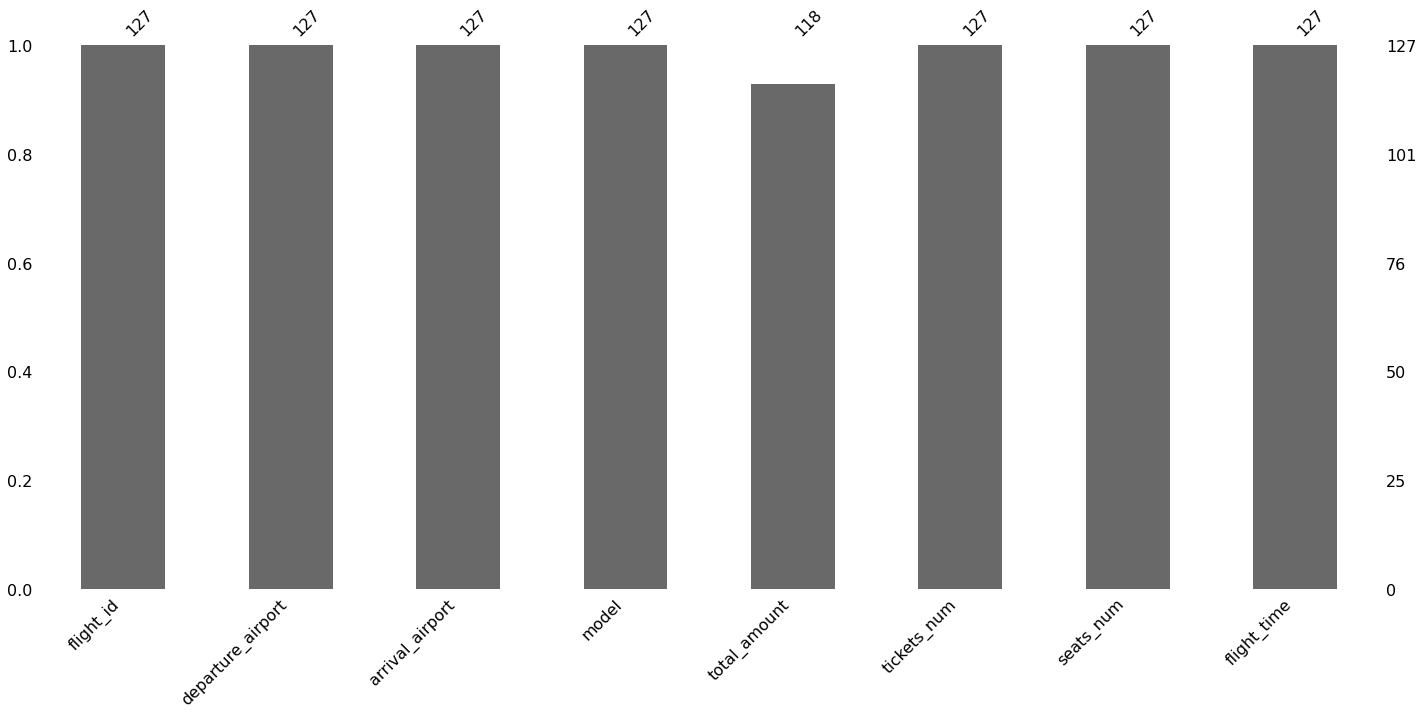

In [32]:
msno.bar(df)

Как видно из графика, 9 полетов за данный период были совершены без проданных билетов. Необходимо провести дальнейший анализ и понять целесообразность данных полетов.

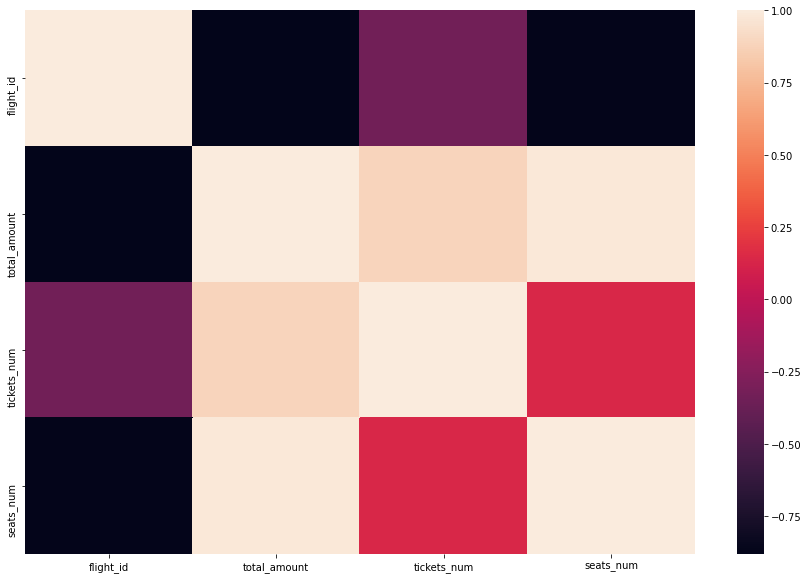

In [40]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr())

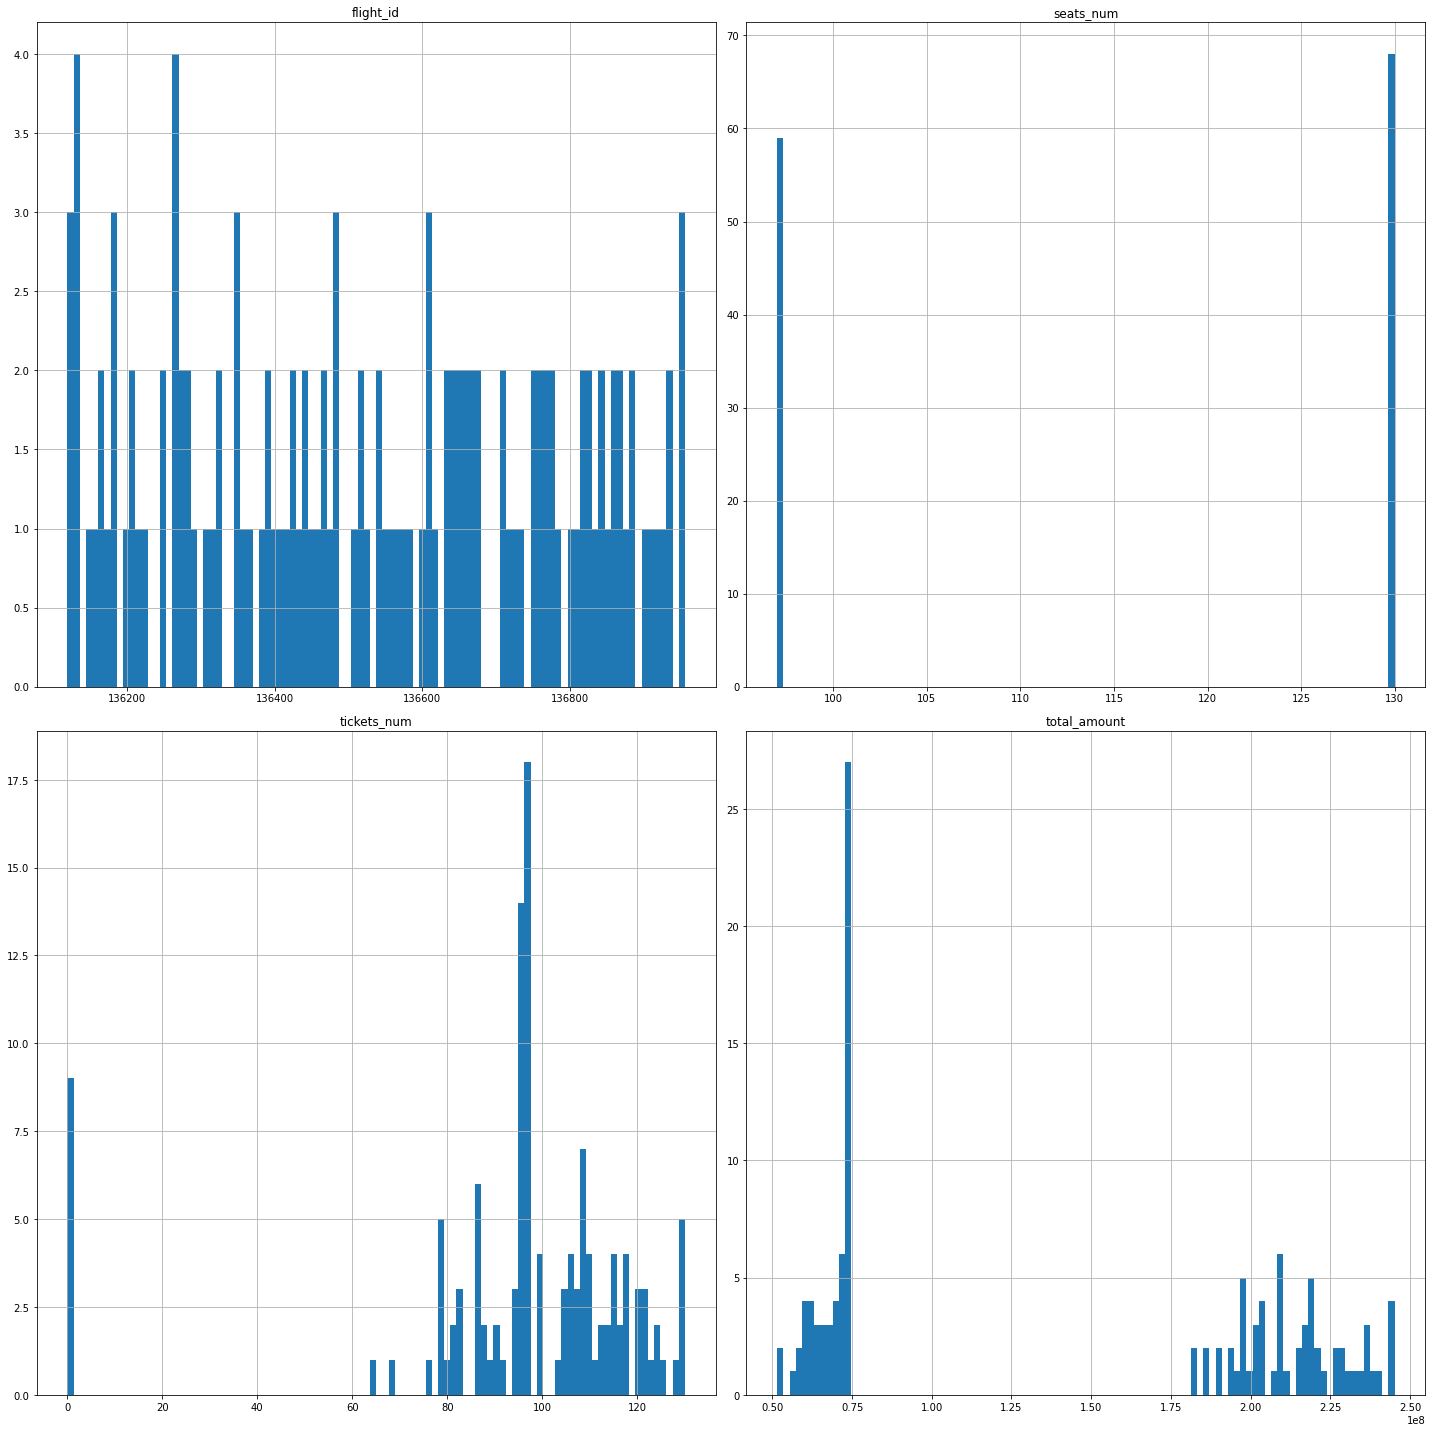

In [17]:
df[['flight_id', 'total_amount', 'tickets_num', 'seats_num']].hist(figsize=(20, 20), bins=100)
plt.tight_layout()
plt.show()

# Возможные дополнительные признаки

### **Себестоимость рейса**
Необходима для понимания прибыльности рейса. Для рассчета данной величины понадобятся следующие (вспомогательные) признаки:
* Количество затраченного топлива. Для его рассчета нужно расстояние или длительность полета.
* Вид топлива и его стоимость (может варьироваться в зависимости от модели самолета)

### **Примерный расчет полной суммы затрат на рейс**
Необходим для полного понимания картины. Возможен рассчет с помощью коэффициентов, взятых из открытых источников, либо на основании данных, предоставленных компанией.